In [1]:
import os.path
import sys
sys.path.extend([os.path.dirname(os.path.dirname(os.path.abspath(os.path.curdir)))])

In [2]:
from formulapy.data.ergast import Formula1
f1 = Formula1()

In [3]:
f1.seasons.s2015.races

['AustralianGrandPrix_1', 'MalaysianGrandPrix_2', 'ChineseGrandPrix_3', 'BahrainGrandPrix_4', 'SpanishGrandPrix_5', 'MonacoGrandPrix_6', 'CanadianGrandPrix_7', 'AustrianGrandPrix_8', 'BritishGrandPrix_9', 'HungarianGrandPrix_10', 'BelgianGrandPrix_11', 'ItalianGrandPrix_12', 'SingaporeGrandPrix_13', 'JapaneseGrandPrix_14', 'RussianGrandPrix_15', 'UnitedStatesGrandPrix_16', 'MexicanGrandPrix_17', 'BrazilianGrandPrix_18', 'AbuDhabiGrandPrix_19']

In [4]:
f1.seasons.s2015.races.BahrainGrandPrix_4

2015-4: Bahrain Grand Prix

In [5]:
f1.seasons.s2015.races.BahrainGrandPrix_4.laps

['lap1', 'lap2', 'lap3', 'lap4', 'lap5', 'lap6', 'lap7', 'lap8', 'lap9', 'lap10', 'lap11', 'lap12', 'lap13', 'lap14', 'lap15', 'lap16', 'lap17', 'lap18', 'lap19', 'lap20', 'lap21', 'lap22', 'lap23', 'lap24', 'lap25', 'lap26', 'lap27', 'lap28', 'lap29', 'lap30', 'lap31', 'lap32', 'lap33', 'lap34', 'lap35', 'lap36', 'lap37', 'lap38', 'lap39', 'lap40', 'lap41', 'lap42', 'lap43', 'lap44', 'lap45', 'lap46', 'lap47', 'lap48', 'lap49', 'lap50', 'lap51', 'lap52', 'lap53', 'lap54', 'lap55', 'lap56', 'lap57']

In [6]:
df = f1.seasons.s2015.races.BahrainGrandPrix_4.laps.to_df()

In [7]:
df.head()

,driverId,lap_number,position,seconds,time
0,hamilton,1,1,101.390,00:01:41.390000
1,vettel,1,2,102.217,00:01:42.217000
2,raikkonen,1,3,102.896,00:01:42.896000
3,rosberg,1,4,103.381,00:01:43.381000
4,bottas,1,5,104.432,00:01:44.432000


In [8]:
df = df.ix[df.seconds < 200, :]

In [9]:
import seaborn as sns
%matplotlib inline
sns.mpl.rcParams['figure.figsize'] = (16, 10)

In [10]:
laps = df.lap_number.unique()
finish_order = df.sort(['lap_number', 'position']).groupby(['driverId'], as_index=False).last()
finish_order = finish_order.sort(['lap_number', 'position'], ascending=[False, True])

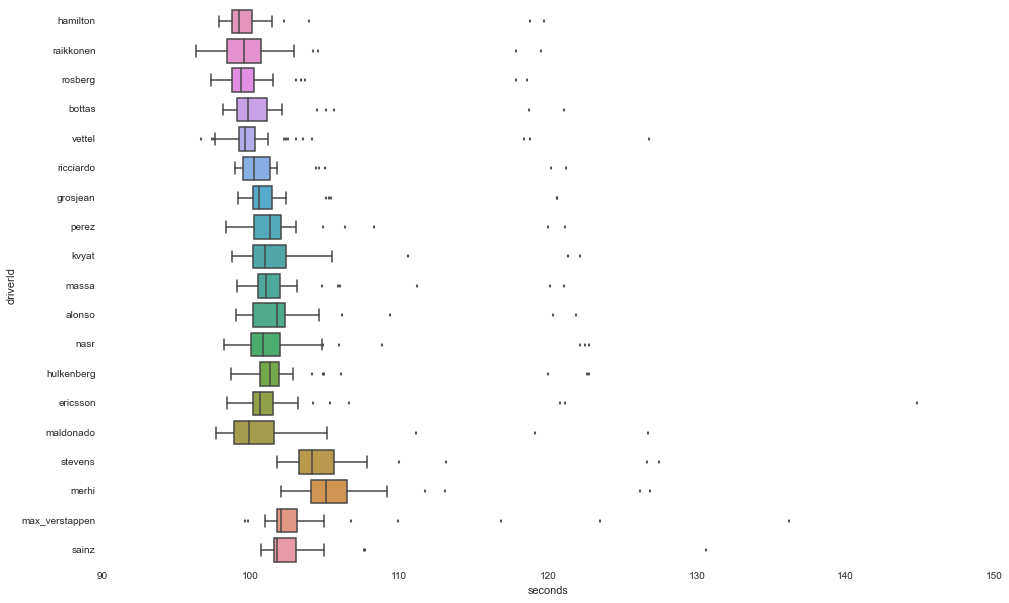

In [11]:
ids = reversed(finish_order.driverId.values)
ids = [str(item) for item in ids]
sns.boxplot(df.seconds, df.driverId, names=ids, order=ids, vert=False)